# Problem 1 
N/A

# Problem 2
xi = time to load Canvas in milliseconds
λ*e^-λ*x
Derive the maximum likelihood estimate for λ from first principles


In [ ]:
# Problem 3

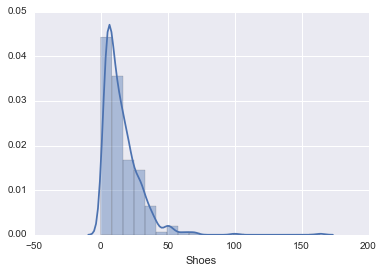

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
student_data = pd.read_csv("studentdata.csv", sep=' ', quoting = 1)

#print(student_data.shape)
student_data = student_data.dropna()
student_data.head()

shoes = student_data['Shoes'].tolist()
sns.distplot(shoes,bins=20,axlabel = "Shoes")


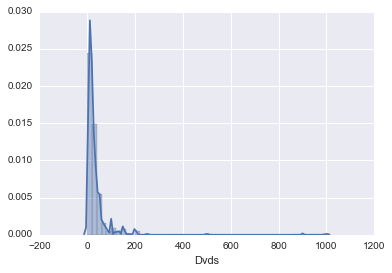

In [10]:
# B)
dvds = student_data['Dvds'].tolist()
sns.distplot(dvds, axlabel = "Dvds")
# It appears to follow a log normal distribution

In [11]:
# C)
student_data['Haircut'].describe()

count    559.000000
mean      26.228569
std       27.782842
min        0.000000
25%       10.000000
50%       17.000000
75%       30.000000
max      180.000000
Name: Haircut, dtype: float64

In [ ]:
# C) continued
student_data['Haircut'].describe([0.025, 0.975])

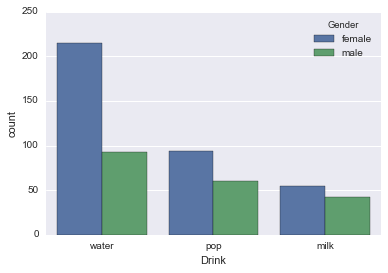

In [12]:
# D)
Drink  = student_data['Drink'].tolist()
sns.countplot(x = 'Drink', hue = 'Gender', data = student_data)

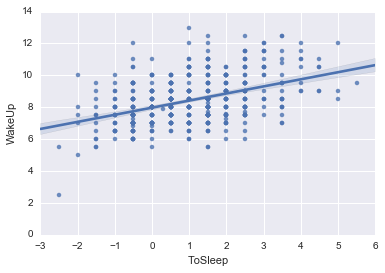

In [13]:
# E)
sns.regplot(x = 'ToSleep', y='WakeUp', data = student_data)
# There is a positive correlation between to sleep and wakeup showing that 
# the later you go to bed the later you wake up